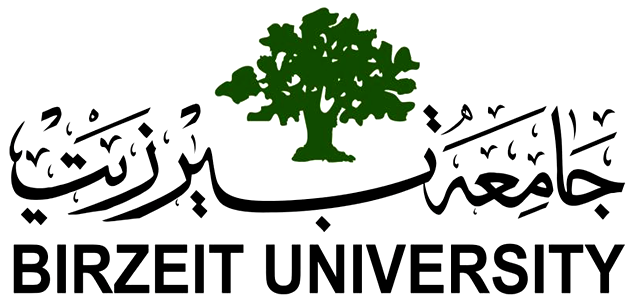

-------------------------------------------------------------------------
# **Electrical and Computer Engineering Department**
**`Machine Learning and Data Science ‐ ENCS5341`**
# **Assignment # 2**
----------------------------------------------------

# **Prepared by:** Jehad Hamayel 1200348
**Section number:** 2

**Instructor:** Dr. Yazan Abu Farha

**Date & Place:** 21/12/2023, Masri202

---


# Welcome to my Assignment

---



### **In the beginning, here I imported some of the Python offices needed for the program**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression

# Model Selection and Hyper-parameters Tunning

## 1-Read and split the data to training, validation, testing set

* The data was read from the CSV file and divided into a training set (the first 120 examples), a validation set (the next 40 examples), and a test set (the last 40 examples). The data_reg.csv file contains a set of 200 examples. Each row represents one
example which has two attributes x1 and x2, and a continuous target label y

In [2]:
#Read data_reg file
RegData = pd.read_csv('data_reg.csv')
#split the data to training, validation, testing
TrainingSet = RegData.iloc[:120]
ValidationSet = RegData.iloc[120:160]
TestingSet = RegData.iloc[160:]
print("Training Set:\n",TrainingSet)
print("Validation Set:\n",ValidationSet)
print("Testing Set:\n",TestingSet)

Training Set:
            x1        x2         y
0    0.548814  0.311796  0.547818
1    0.715189  0.696343  0.576032
2    0.602763  0.377752  0.113475
3    0.544883  0.179604  1.072286
4    0.423655  0.024679  0.624525
..        ...       ...       ...
115  0.396506  0.245367  0.493161
116  0.881103  0.420539  1.418913
117  0.581273  0.557369  0.129485
118  0.881735  0.860551  2.578728
119  0.692532  0.727044 -0.741409

[120 rows x 3 columns]
Validation Set:
            x1        x2         y
120  0.725254  0.270328  0.486485
121  0.501324  0.131483  0.813994
122  0.956084  0.055374  2.835160
123  0.643990  0.301599 -0.304306
124  0.423855  0.262118  0.775401
125  0.606393  0.456141  0.261249
126  0.019193  0.683281  1.994160
127  0.301575  0.695625  0.742481
128  0.660174  0.283519  0.901669
129  0.290078  0.379927  0.515408
130  0.618015  0.181151  1.047882
131  0.428769  0.788546  0.506162
132  0.135474  0.056848  2.113095
133  0.298282  0.696997  0.021230
134  0.569965  0.778695  0

---
* Examples from the three groups are plotted in a scatter plot (each group is coded in a different color) as shown in the following figure. Here the chart is a 3D chart where the x and y axes represent the x1 and x2 features, while the z axis is the target label y.

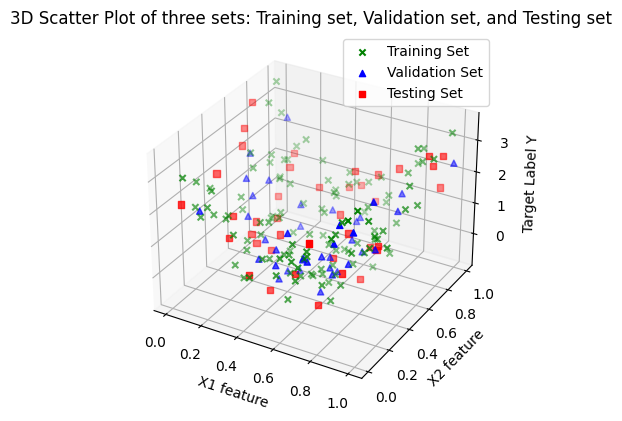

In [3]:
#plot (each group is coded in a different color)
ThreeDplot = plt.figure().add_subplot(projection='3d')
ThreeDplot.scatter(TrainingSet['x1'],TrainingSet['x2'],TrainingSet['y'],c='g',marker='x',label='Training Set')
ThreeDplot.scatter(ValidationSet['x1'],ValidationSet['x2'],ValidationSet['y'],c='b',marker='^',label='Validation Set')
ThreeDplot.scatter(TestingSet['x1'],TestingSet['x2'],TestingSet['y'],c='r',marker='s',label='Testing Set')
ThreeDplot.set_xlabel('X1 feature')
ThreeDplot.set_ylabel('X2 feature')
ThreeDplot.set_zlabel('Target Label Y')
ThreeDplot.set_title('3D Scatter Plot of three sets: Training set, Validation set, and Testing set')
ThreeDplot.legend()
plt.show()

## 2-Applying polynomial regression on the training set with degrees in the range of 1 to 10

* The next function is to prepare the Linear Regression for Polynomial Features equation, extract the learning function, and draw the plan in it, where the Prediction appears in which the learning function and the validation error are calculated to draw it later, and the value is retrieved, and then the polynomial degree plan is drawn.

In [4]:
def polynomialRegressionWithPlot(degree, xTrain, yTrain, xVal, yVal):
    #Prepare the Polynomial Features equation according to the desired degree in order to make the data in Polynomial form
    polynomialEq = PolynomialFeatures(degree)
    #Enter data into transform and output data into Polynomial form
    polyXTrain = polynomialEq.fit_transform(xTrain)
    polyXVal=polynomialEq.transform(xVal)

    Regression = LinearRegression(fit_intercept=False)
    #Linear Regression for Polynomial Features equation
    Regression.fit(polyXTrain, yTrain)
    #Prediction Data of Validation set
    yValPredict=Regression.predict(polyXVal)
    yTranPredict=Regression.predict(polyXTrain)
    #Calculate the mean squared error between real data and predicted data
    validationMeanSquaredError = mean_squared_error(yVal,yValPredict)
    print(f"\nValidation Error For Polynomial Regression with Degree:{degree} --> MSE = ",validationMeanSquaredError,"\n")
    tranMeanSquaredErrorTran = mean_squared_error(yTrain,yTranPredict)
    #3D drawing of the learning plan with the special data in the training set
    ThreeDplot = plt.figure()
    ThreeDplot=ThreeDplot.add_subplot(projection='3d')
    ThreeDplot.scatter(xTrain["x1"], xTrain["x2"], yTrain, color='g', marker='o', label='Training Data Set')
    ThreeDplot.legend()
    #Preparing learning plan
    x1Range = np.linspace(xTrain["x1"].min(), xTrain["x1"].max(), 120)
    x2Range = np.linspace(xTrain["x2"].min(), xTrain["x2"].max(), 120)
    Xax,Yax = np.meshgrid(x1Range, x2Range)
    XYPlan = pd.DataFrame({'x1': Xax.flatten(), 'x2': Yax.flatten()})
    polyXYPlan=polynomialEq.transform(XYPlan[['x1','x2']])
    Zax=Regression.predict(polyXYPlan).reshape(Xax.shape)
    ThreeDplot.plot_surface(Xax,Yax,Zax,alpha=0.5,cmap='viridis')
    ThreeDplot.set_xlabel('x1 feature')
    ThreeDplot.set_ylabel('x2 feature')
    ThreeDplot.set_zlabel('Target Label Y')
    ThreeDplot.set_title(f'3D Scatter Plot of Learning surface with Polynomial Degree= {degree}')
    plt.show()
    return validationMeanSquaredError , tranMeanSquaredErrorTran

* The following code calls the special function in polynomialRegression and gives it scores from 1 to 10, where the following results appear, which explain the learning plan and the printing of the MSE.


Validation Error For Polynomial Regression with Degree:1 --> MSE =  0.9118245838494788 



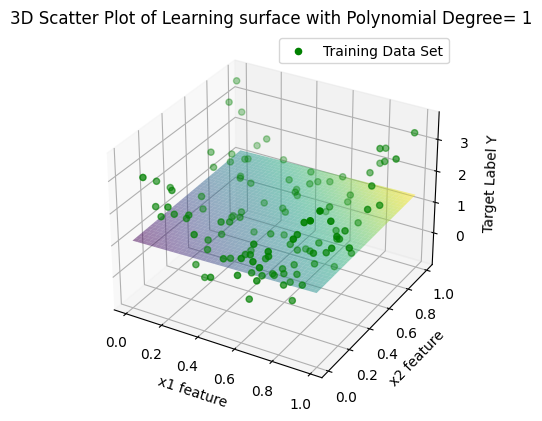


Validation Error For Polynomial Regression with Degree:2 --> MSE =  0.17990349576391815 



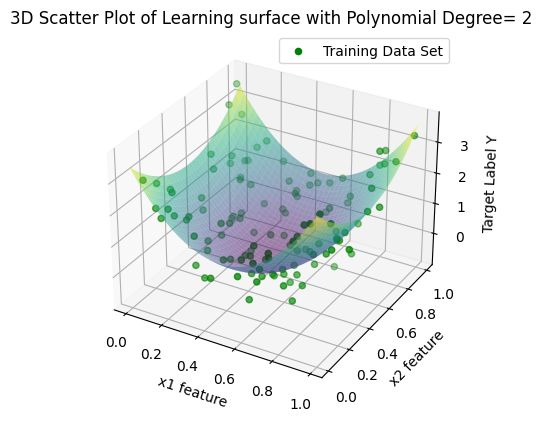


Validation Error For Polynomial Regression with Degree:3 --> MSE =  0.2024332725287564 



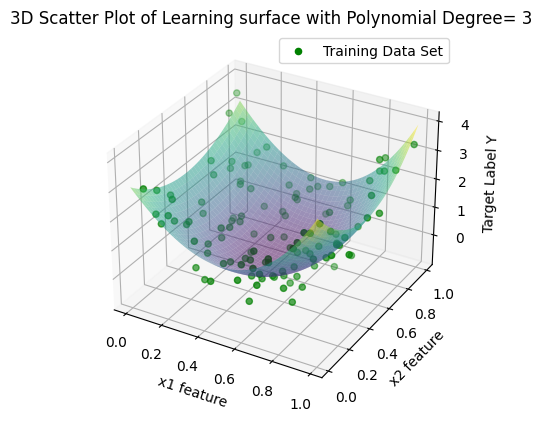


Validation Error For Polynomial Regression with Degree:4 --> MSE =  0.23268739290548127 



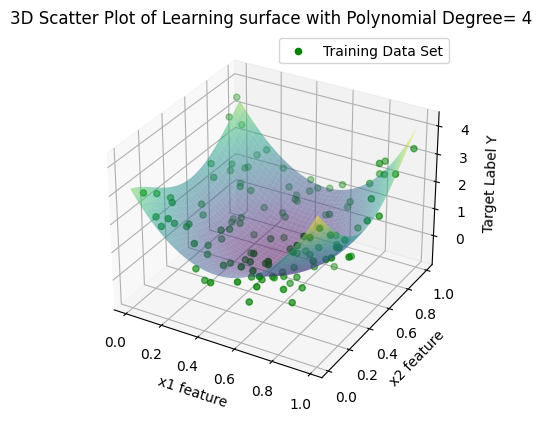


Validation Error For Polynomial Regression with Degree:5 --> MSE =  0.22998004318855608 



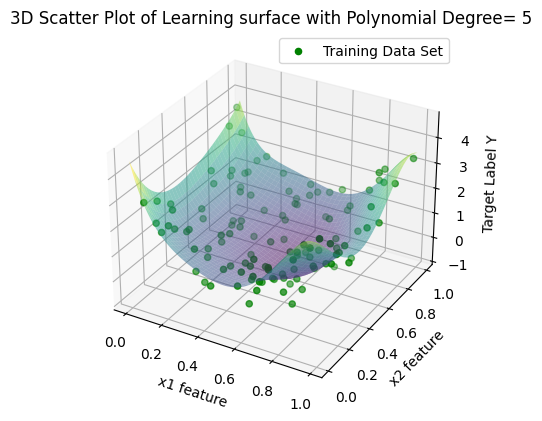


Validation Error For Polynomial Regression with Degree:6 --> MSE =  0.22539808216993137 



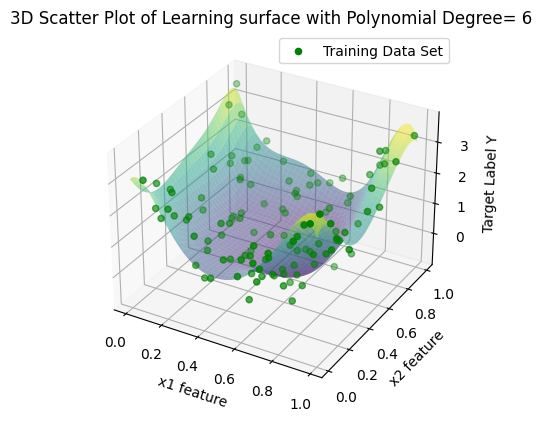


Validation Error For Polynomial Regression with Degree:7 --> MSE =  0.29208157167506227 



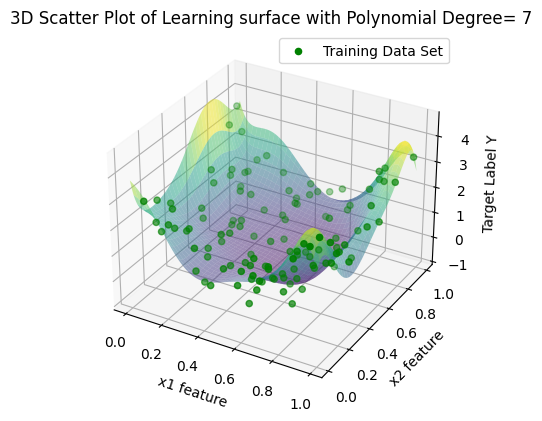


Validation Error For Polynomial Regression with Degree:8 --> MSE =  0.36067674061799526 



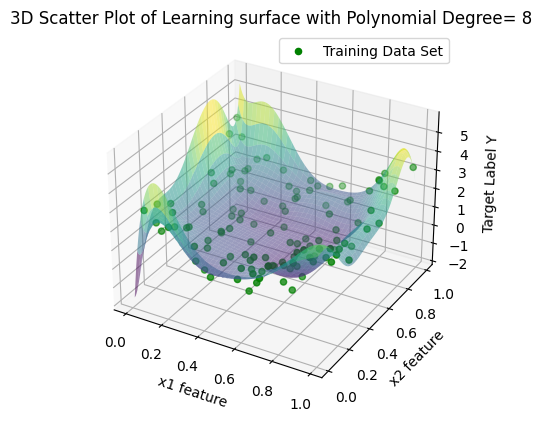


Validation Error For Polynomial Regression with Degree:9 --> MSE =  0.4122843867624108 



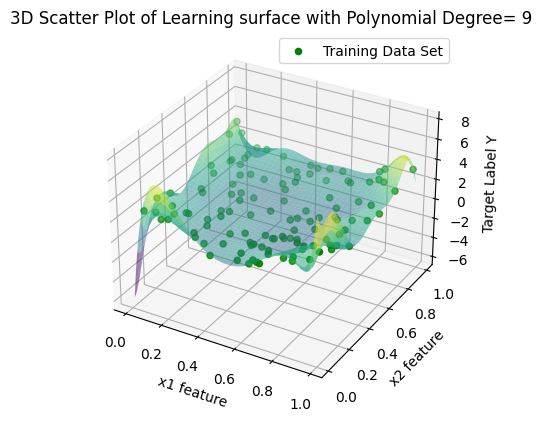


Validation Error For Polynomial Regression with Degree:10 --> MSE =  0.5824223941099151 



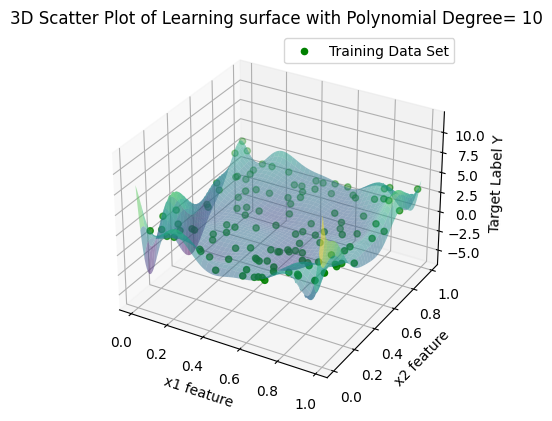

In [5]:
degrees = range(1,11)
validationErrorVsDegree = []
tranErrorVsDegree = []
for i in degrees:
    validationMeanSquaredError,TranMeanSquaredErrorTran = polynomialRegressionWithPlot(i, TrainingSet[['x1','x2']], TrainingSet['y'],ValidationSet[['x1','x2']],ValidationSet['y'])
    validationErrorVsDegree.append(validationMeanSquaredError)
    tranErrorVsDegree.append(TranMeanSquaredErrorTran)


* In the following code, Validation Error vs Polynomial Degree is drawn to show the relationship between them

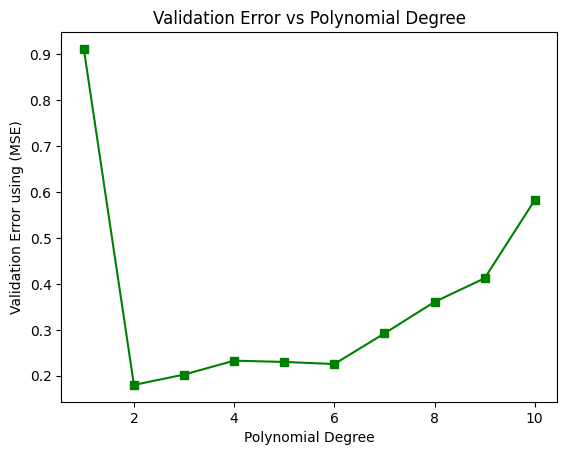

In [6]:
#Ploting Validation Error vs Polynomial Degree
plt.plot(degrees,validationErrorVsDegree,marker='s',c="g")
plt.title('Validation Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation Error using (MSE)')
plt.show()

* As shown in the relationship, degree 2 is the best polynomial degree, as it has the lowest MSE, and it appears in the first degree. The MSE was very high, as it was underfitting, and after the second degree, regression became overfitting on the training, but in return it became bad on the validation, as shown in the following image: the training set with the MSE.

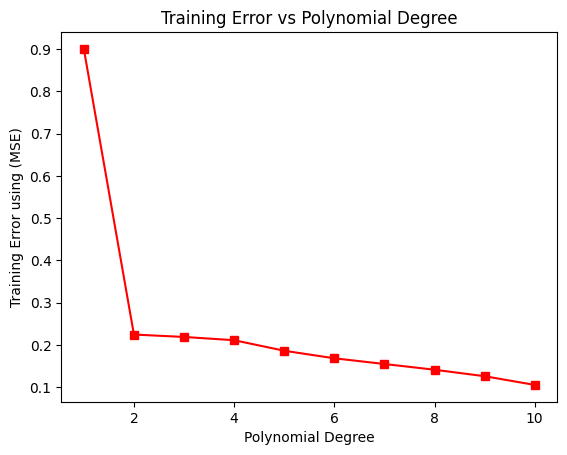

In [7]:
#ploting Training Error vs Polynomial Degree
plt.plot(degrees,tranErrorVsDegree,marker='s',c="r")
plt.title('Training Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Training Error using (MSE)')
plt.show()

## 3- Applying ridge regression on the training set to fit a polynomial of degree 8. For the regularization parameters : {0.001, 0.005, 0.01, 0.1, 10}

* Through this code, ridge regression is used with different values of alpha (0.001, 0.005, 0.01, 0.1, 10) using the polynomial function of degree 8 and calculating the MSE for Validation Set so as to know which alpha is better and finally plotting the MSE on Validation Set vs Regularization Parameter

MSE (alpha:0.001) = 0.21328279933162908
MSE (alpha:0.005) = 0.21103057625547303
MSE (alpha:0.01) = 0.21000748257043284
MSE (alpha:0.1) = 0.23731679848672277
MSE (alpha:10) = 0.5086522825651428


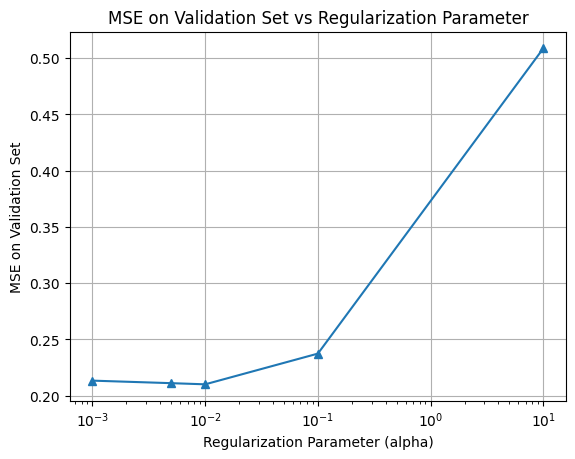

In [8]:
alpha=[0.001, 0.005, 0.01, 0.1, 10]
MSESOfVal = []
for i in alpha:
    #Prepare the Polynomial Features equation according to the 8 degree in order to make the data in Polynomial form
    polynomialEq = PolynomialFeatures(8)
    #Enter data into transform and output data into Polynomial form
    polyXTrain = polynomialEq.fit_transform(TrainingSet[['x1','x2']])
    polyXVal = polynomialEq.transform(ValidationSet[['x1','x2']])
    #Ridge Regression for Polynomial Features equation
    ridgeReg = Ridge(alpha=i,fit_intercept=False)
    ridgeReg.fit(polyXTrain,TrainingSet['y'])
    #Predicted Value for the Validation Data
    polyXValPred=ridgeReg.predict(polyXVal)
    #Calculate the MSE value
    MSEOfVal = mean_squared_error(ValidationSet['y'],polyXValPred)
    print(f"MSE (alpha:{i}) =",MSEOfVal)
    MSESOfVal.append(MSEOfVal)
#Ploting MSE on Validation Set vs Regularization Parameter
plt.plot(alpha,MSESOfVal,marker='^')
plt.xscale('log')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('MSE on Validation Set')
plt.title('MSE on Validation Set vs Regularization Parameter')
plt.grid(True)
plt.show()

* As we can see from the above result, alpha: 0.01 is the best one, as it has the lowest MSE, and this is the best regularization parameter.

# Logistic Regression

## 1- Learning a logistic regression model with a linear decision boundary

* The train_cls.csv file contains a set of training examples for a binary classification problem, and the testing examples are provided in the test_cls.csv file.First, the files were read in order to perform the required operation on them.

In [9]:
#Read train_cls and test_cls Files
trainingData = pd.read_csv('train_cls.csv')
testingData = pd.read_csv('test_cls.csv')
print("Training Data\n",trainingData)
print("Testing Data\n",testingData)

Training Data
       x1    x2 class
0   0.30  0.69    C1
1  -0.77  0.55    C1
2  -0.14  0.89    C1
3  -0.85  0.92    C1
4  -0.26  0.69    C1
..   ...   ...   ...
57  0.32  0.38    C2
58  0.02  0.42    C2
59  0.27  0.33    C2
60  0.25  0.28    C2
61 -0.08 -0.27    C2

[62 rows x 3 columns]
Testing Data
       x1    x2 class
0  -0.59  0.80    C1
1   0.49  0.65    C1
2   0.06  0.95    C1
3  -0.25 -0.21    C2
4  -0.04 -0.71    C1
5  -0.86  0.22    C1
6   0.99 -0.47    C1
7  -0.03  0.89    C1
8  -0.66 -0.93    C1
9  -0.08 -0.45    C1
10  0.41  0.65    C1
11 -0.63 -0.78    C1
12 -0.03  0.01    C2
13 -0.28  0.07    C2
14  0.06  0.10    C2
15  0.47 -0.00    C2
16  0.53 -0.20    C2
17 -0.02 -0.16    C2
18  0.53  0.12    C2
19  0.33 -0.02    C2
20  0.61 -0.03    C2
21  0.24 -0.32    C2


* The next step was to represent class C1 with 0 and class C2 with 1 because it is a binary classification problem

In [10]:
#Maping class C1 with 0 and class C2 with 1
trainingData['class'] = trainingData['class'].map({'C1':0,'C2':1})
testingData['class'] = testingData['class'].map({'C1':0,'C2':1})
print("Training Data\n",trainingData)
print("Testing Data\n",testingData)

Training Data
       x1    x2  class
0   0.30  0.69      0
1  -0.77  0.55      0
2  -0.14  0.89      0
3  -0.85  0.92      0
4  -0.26  0.69      0
..   ...   ...    ...
57  0.32  0.38      1
58  0.02  0.42      1
59  0.27  0.33      1
60  0.25  0.28      1
61 -0.08 -0.27      1

[62 rows x 3 columns]
Testing Data
       x1    x2  class
0  -0.59  0.80      0
1   0.49  0.65      0
2   0.06  0.95      0
3  -0.25 -0.21      1
4  -0.04 -0.71      0
5  -0.86  0.22      0
6   0.99 -0.47      0
7  -0.03  0.89      0
8  -0.66 -0.93      0
9  -0.08 -0.45      0
10  0.41  0.65      0
11 -0.63 -0.78      0
12 -0.03  0.01      1
13 -0.28  0.07      1
14  0.06  0.10      1
15  0.47 -0.00      1
16  0.53 -0.20      1
17 -0.02 -0.16      1
18  0.53  0.12      1
19  0.33 -0.02      1
20  0.61 -0.03      1
21  0.24 -0.32      1


* The following function performs the Logistic Regression process, whether linear or quadratic decision boundary, and then calculates the Accuracy and draws the learned model with the training data and testing data.

In [11]:
def logisticRegression(degree,trainingData,testingData):
    trainingDataX = trainingData[["x1", 'x2']].to_numpy()
    testingDataX = testingData[['x1', 'x2']].to_numpy()
    #Prepare the Polynomial Features equation according to the desired degree in order to make the data in Polynomial form
    polynomialEq = PolynomialFeatures(degree=degree)
    #Enter data into transform and output data into Polynomial form
    polyXTrain=polynomialEq.fit_transform(trainingDataX)
    polyXTest=polynomialEq.transform(testingDataX)
    #Logistic Regression for Polynomial Features equation
    reg = LogisticRegression(fit_intercept=False)
    reg.fit(polyXTrain,trainingData['class'])
    #Calculate the value of training Accuracy and testing Accuracy
    trainingDataPredict = reg.predict(polyXTrain)
    trainingAccuracy = accuracy_score(trainingData['class'],trainingDataPredict)
    print(f"\nTraining Accuracy for degree:{degree}:",trainingAccuracy)
    testingDataPredict = reg.predict(polyXTest)
    testingAccuracy = accuracy_score(testingData['class'],testingDataPredict)
    print(f"Testing Accuracy for degree:{degree}:",testingAccuracy,"\n")
    #ploting the Data with learning Model
    plt.scatter(trainingData['x1'][trainingData['class'] == 0], trainingData['x2'][trainingData['class'] == 0], c='r', marker='x', label='C1',s=10)
    plt.scatter(trainingData['x1'][trainingData['class'] == 1], trainingData['x2'][trainingData['class'] == 1], c='b', marker='o', label='C2',s=10)

    ax = plt.gca()
    xaxlimitations = ax.get_xlim()
    yaxlimitations = ax.get_ylim()

    x1Range = np.linspace(xaxlimitations[0],xaxlimitations[1],100)
    x2Range = np.linspace(yaxlimitations[0],yaxlimitations[1],100)
    x1ax,x2ax = np.meshgrid(x1Range,x2Range)
    classTarget = reg.decision_function(polynomialEq.transform(np.c_[x1ax.ravel(),x2ax.ravel()])).reshape(x1ax.shape)
    plt.contour(x1ax, x2ax, classTarget, levels=[0], alpha=0.5,linestyles=['-'])
    plt.title(f'Logistic Regression Decision Boundary with degree:{degree} decision boundary')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

* loop calls the logisticRegression function


Training Accuracy for degree:1: 0.6612903225806451
Testing Accuracy for degree:1: 0.6818181818181818 



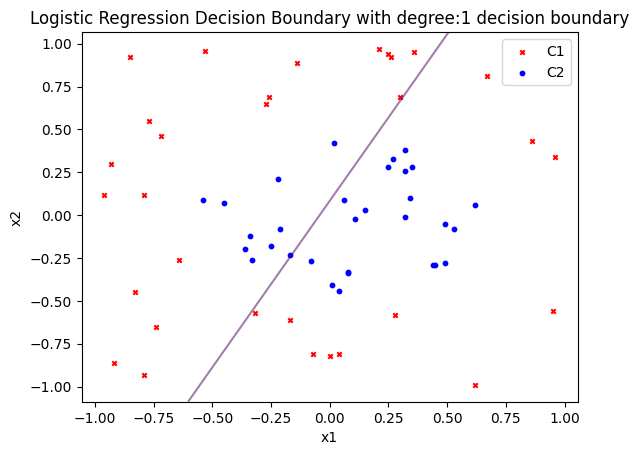


Training Accuracy for degree:2: 0.9838709677419355
Testing Accuracy for degree:2: 0.9545454545454546 



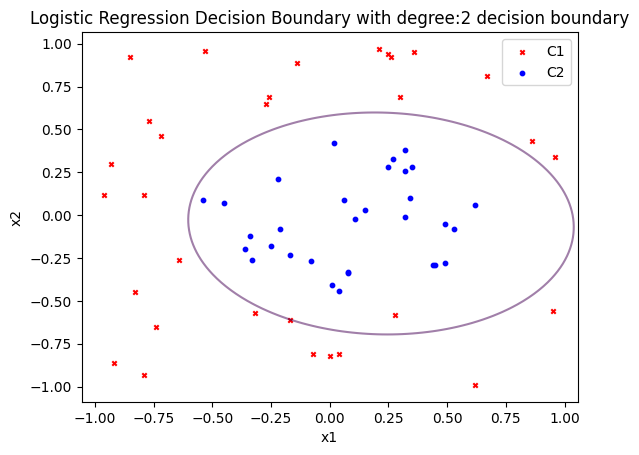

In [13]:
degrees = [1,2]
for i in degrees:
    logisticRegression(i,trainingData,testingData)

* As shown in the previous pictures:
In the first image, the logistic regression model with a linear decision boundary was used, as it appears that there is underfitting in the learned model with Testing Accuracy = 0.66, as it is close to 0.5, and this indicates that it is bad in the prediction, but the logistic regression model with a quadratic decision boundary with Testing Accuracy = 0.95, as it is considered goodfitting